<a href="https://colab.research.google.com/github/ChiTrung-coding/Animal-Detection/blob/master/Training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clone Darknet**

In [26]:

!git config --global --unset http.proxy
# Clone lại Darknet repository
!git clone https://github.com/AlexeyAB/darknet.git



Cloning into 'darknet'...
remote: Enumerating objects: 15873, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 15873 (delta 13), reused 24 (delta 8), pack-reused 15833 (from 1)
Receiving objects: 100% (15873/15873), 14.50 MiB | 10.50 MiB/s, done.
Resolving deltas: 100% (10679/10679), done.


**Compile**

In [27]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet/darknet/darknet


In [28]:
!/usr/local/cuda/bin/nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [29]:
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:

**ultility function**

In [30]:
# Cấp quyền thực thi cho tệp darknet
!chmod +x /content/darknet/darknet/darknet

In [31]:
# Kiểm tra xem tệp darknet có tồn tại không
!ls /content/darknet/darknet/darknet

3rdparty	darknet			Dockerfile.cpu	       LICENSE	      results
backup		DarknetConfig.cmake.in	Dockerfile.gpu	       Makefile       scripts
build		darknet_images.py	image_yolov3.sh        net_cam_v3.sh  src
build.ps1	darknet.py		image_yolov4.sh        net_cam_v4.sh  uselib
cfg		darknet_video.py	include		       obj	      vcpkg.json
cmake		data			json_mjpeg_streams.sh  package.xml    video_yolov3.sh
CMakeLists.txt	docker-compose.yml	libdarknet.so	       README.md      video_yolov4.sh


In [32]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


**CONNECT TO DRIVE**

In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
%cd /content
!rm -rf Animal-Detection
!git clone https://github.com/ChiTrung-coding/Animal-Detection

/content
Cloning into 'Animal-Detection'...
remote: Enumerating objects: 11990, done.
remote: Total 11990 (delta 0), reused 0 (delta 0), pack-reused 11990 (from 1)
Receiving objects: 100% (11990/11990), 1.48 GiB | 17.71 MiB/s, done.
Updating files: 100% (12000/12000), done.


In [35]:
%cd /
from glob import glob
dataset_dir = "/content/gdrive/MyDrive/animal detection/"

img_list = glob(dataset_dir+'*.jpg')
# you should have images with labels.txt in same folder
print("your images :",len(img_list))

/
your images : 1553


**Split data into train validate test**

In [36]:
from sklearn.model_selection import train_test_split

train_img_list = img_list

train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=42)

train_img_list, test_img_list = train_test_split(train_img_list, test_size=0.25, random_state=42)    #0.8 * 0.25 = 0.2

print(len(train_img_list), len(val_img_list), len(test_img_list))

931 311 311


In [37]:
import os

# Đường dẫn tới thư mục 'data'
data_dir = '/content/Animal-Detection/data/'

# Tạo thư mục 'data' nếu nó chưa tồn tại
os.makedirs(data_dir, exist_ok=True)

# Ghi danh sách ảnh vào các tệp train.txt, val.txt, test.txt
with open(os.path.join(data_dir, 'train.txt'), 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')

with open(os.path.join(data_dir, 'val.txt'), 'w') as f:
    f.write('\n'.join(val_img_list) + '\n')

with open(os.path.join(data_dir, 'test.txt'), 'w') as f:
    f.write('\n'.join(test_img_list) + '\n')

print("Done")

Done


**Training**

In [83]:
!mkdir /content/Animal-Detection/config



mkdir: cannot create directory ‘/content/Animal-Detection/config’: File exists


In [60]:
!echo "classes = 8" > /content/Animal-Detection/config/object.data
!echo "train = /content/Animal-Detection/data/train.txt" >> /content/Animal-Detection/config/object.data
!echo "valid = /content/Animal-Detection/data/valid.txt" >> /content/Animal-Detection/config/object.data
!echo "names = /content/Animal-Detection/data/classes.names" >> /content/Animal-Detection/config/object.data
!echo "backup = /content/Animal-Detection/backup/" >> /content/Animal-Detection/config/object.data


In [61]:
!cat /content/Animal-Detection/config/object.data


classes = 8
train = /content/Animal-Detection/data/train.txt
valid = /content/Animal-Detection/data/valid.txt
names = /content/Animal-Detection/data/classes.names
backup = /content/Animal-Detection/backup/


In [71]:
!wget -O /content/Animal-Detection/config/animal.cfg https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg


--2024-11-18 06:47:17--  https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12231 (12K) [text/plain]
Saving to: ‘/content/Animal-Detection/config/animal.cfg’

/content/Animal-Det 100%[===================>]  11.94K  --.-KB/s    in 0s      

2024-11-18 06:47:18 (113 MB/s) - ‘/content/Animal-Detection/config/animal.cfg’ saved [12231/12231]



In [72]:
!ls /content/Animal-Detection/config/


animal.cfg  object.data


In [73]:
%cd /content/darknet/darknet/darknet
!./darknet detector train /content/Animal-Detection/config/object.data \
                          /content/Animal-Detection/config/animal.cfg \
                          -dont_show

/content/darknet/darknet/darknet
 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
animal
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 8, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outpu

**Continue training from previous weight**


In [75]:
%cd /content/darknet/darknet/darknet
!./darknet detector train /content/Animal-Detection/config/object.data\
                          /content/Animal-Detection/config/animal.cfg\
                          /content/gdrive/MyDrive/animal_last.weights\
                          -dont_show

/content/darknet/darknet/darknet
 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
animal
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 8, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outpu

In [76]:
from IPython.display import clear_output

In [78]:
# Danh sách lớp động vật mới
classes = [
    "Cow", "Buffalo", "Cat", "Dog", "Deer", "Lion", "Eagle", "Tiger",
    "Pig", "Chicken", "Rabbit", "Goat", "Deer", "Dog"
]

# Lưu vào tệp classes.names
with open("/content/Animal-Detection/data/classes.names", "w") as f:
    for class_name in classes:
        f.write(f"{class_name}\n")


In [79]:
!./darknet detector map /content/Animal-Detection/config/object.data\
                        /content/Animal-Detection/config/animal.cfg\
                        /content/gdrive/MyDrive/animal_last.weights\

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv   

In [90]:
!ls /content/gdrive/MyDrive/


'0119(1).mp4'
'03-Nguyễn Trần Chí Trung-2254810287.docx'
 27-09-23.zip
'52-02-NGUYỄN THANH TRIỀU.docx'
'AdFund - Fund Raising Platform Website _ Android-iOS App _ Admin Panel-20231225T052805Z-001.zip'
'animal detection'
 Animal-Detection
'Bài nộp 22ĐHTT06'
'BẢNG DÒ THÔNG TIN HỌC BỔNG HK 2 - NH 2023-2024.xlsx'
'Bảng kê khai - 22ĐHTT06.gsheet'
'Bảng tính không có tiêu đề (1).gsheet'
'Bảng tính không có tiêu đề (2).gsheet'
'Bảng tính không có tiêu đề.gsheet'
'Báo cáo Đồ Án.docx'
'Bird-Vươn Cao Trên Cánh Đồng Mơ Ước'
'Cà Mau'
'CÂU HỎI ÔN TẬP QUẢN TRỊ MẠNG.docx'
 chattiembanhyeuthuong
'Colab Notebooks'
 content
'Cố vấn học tập.docx'
'darknet '
'Đồ án cơ sở ngành (010100085103) - Nhóm 6 - Tiến độ 3-2.docx'
 DreamTeam3.gsheet
 FARM
 hanghoa
 IMG_7807.HEIC
 IMG_7987.HEIC
 IMG_8180.JPG
 IMG_9680.jpeg
'Infix LMS - Learning Management System-20231223T063550Z-001.zip'
 LapFormAicoju
 LMS
'Mau bao cao nhom-1.docx'
'

In [97]:
# Đường dẫn tới file animal.cfg trong Google Drive
cfg_path = '/content/Animal-Detection/config/animal.cfg'

# Mở và chỉnh sửa file
with open(cfg_path, 'r') as file:
    cfg_content = file.read()

# Hiển thị nội dung của file
print(cfg_content)

# Thực hiện chỉnh sửa tại đây, ví dụ chỉnh sửa số lớp classes


[net]
batch=64
subdivisions=8
# Training
#width=512
#height=512
width=608
height=608
channels=3
momentum=0.949
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.0013
burn_in=1000
max_batches = 500500
policy=steps
steps=400000,450000
scales=.1,.1

#cutmix=1
mosaic=1

#:104x104 54:52x52 85:26x26 104:13x13 for 416

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=mish

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

In [100]:
# Chỉnh sửa số lớp
cfg_content = cfg_content.replace('filters=255', 'filters=57')

# Ghi lại nội dung vào file
with open(cfg_path, 'w') as file:
    file.write(cfg_content)

print("Đã sửa thành công file animal.cfg!")

Đã sửa thành công file animal.cfg!


In [101]:
# Chỉnh sửa số lớp
cfg_content = cfg_content.replace('classes=80', 'classes=14')

# Ghi lại nội dung vào file
with open(cfg_path, 'w') as file:
    file.write(cfg_content)

print("Đã sửa thành công file animal.cfg!")

Đã sửa thành công file animal.cfg!


In [106]:
import os
print(os.path.exists('/content/gdrive/MyDrive/test_image.jpg'))


True


 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv   

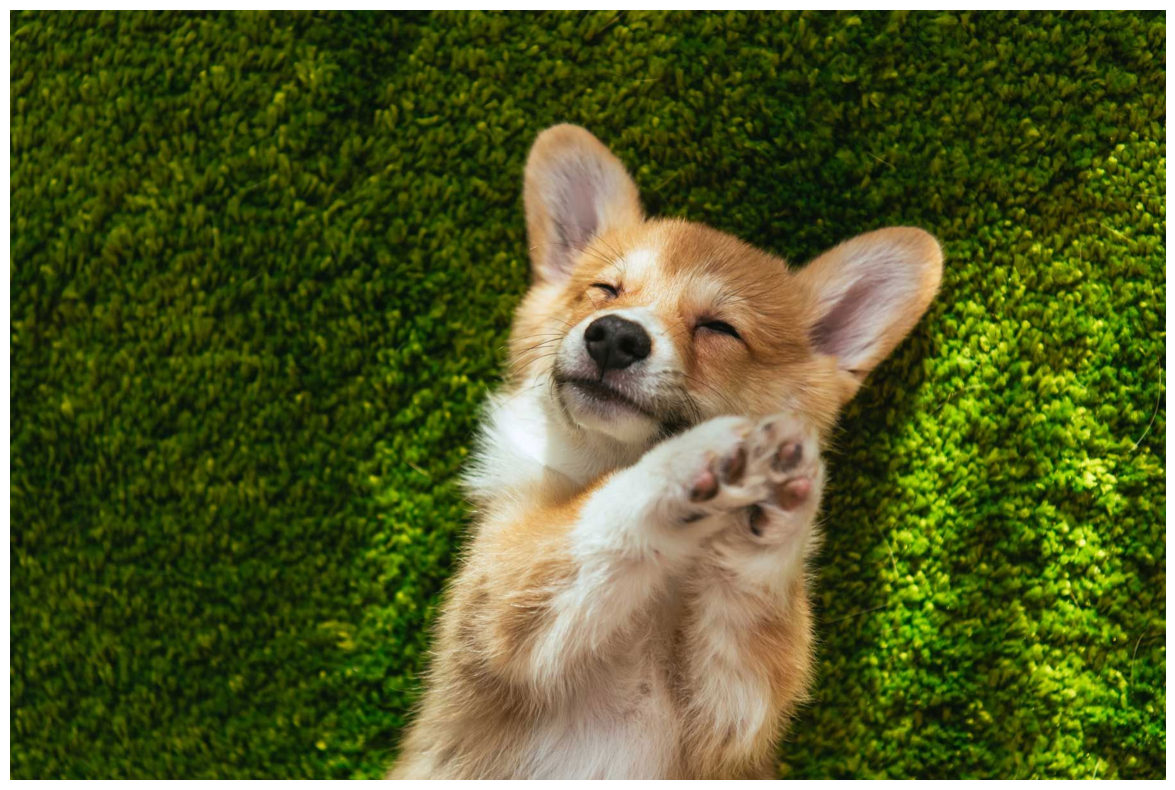

In [111]:
!./darknet detector test /content/Animal-Detection/config/object.data /content/Animal-Detection/config/animal.cfg /content/gdrive/MyDrive/animal_best.weights /content/gdrive/MyDrive/test_image.jpg

imShow('predictions.jpg')